# 🎵 K-Means Clustering: Guía Completa con Música de Spotify


**Fecha:** Junio 2025  
**Objetivo:** Aprender K-Means con ejemplos cotidianos y datos musicales reales

---

## 📚 ¿Qué aprenderás?

- 🎯 **K-Means explicado con analogías simples** (como organizar una fiesta)
- 🔧 **Implementación desde cero** con código comentado paso a paso
- 🎵 **Caso práctico real:** Agrupar canciones de Spotify por características musicales
- 📊 **Evaluación y visualización** de resultados
- ⚠️ **Limitaciones y mejores prácticas**

---

## 🎉 La Analogía de la Fiesta

Imagina que organizas una fiesta con **100 invitados** y tienes **5 mesas redondas**. Tu objetivo es sentar a las personas de manera que en cada mesa estén los invitados más **similares** entre sí.

**¿Cómo lo harías?**

1. **Paso 1:** Colocas las 5 mesas en posiciones aleatorias
2. **Paso 2:** Cada invitado se sienta en la mesa más cercana
3. **Paso 3:** Mueves cada mesa al centro del grupo sentado en ella
4. **Paso 4:** Repites hasta que nadie quiera cambiar de mesa

**¡Esto es exactamente K-Means!**

| Analogía | K-Means |
|----------|----------|
| Invitados | Puntos de datos |
| Mesas | Centroides |
| Número de mesas (5) | K (número de clusters) |
| Distancia a la mesa | Distancia euclidiana |
| Centro del grupo | Promedio de coordenadas |

## 🛠️ Configuración Inicial

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans as SklearnKMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos bonitos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente")
print(f"📊 Versión de NumPy: {np.__version__}")
print(f"🐼 Versión de Pandas: {pd.__version__}")

✅ Librerías importadas correctamente
📊 Versión de NumPy: 2.0.2
🐼 Versión de Pandas: 2.2.2


## 📖 Fundamentos Teóricos

### ¿Qué es la Distancia Euclidiana?

Es la distancia en línea recta entre dos puntos. Como medir con una regla la distancia entre tu casa y el supermercado.

**Fórmula:** `distancia = √[(x₂-x₁)² + (y₂-y₁)²]`

**Ejemplo:** Si tu casa está en (2, 3) y el supermercado en (5, 7):
```
distancia = √[(5-2)² + (7-3)²] = √[9 + 16] = √25 = 5 unidades
```

### ¿Qué es un Centroide?

Es el punto promedio de todos los puntos en un grupo. Como el punto de encuentro ideal entre amigos.

**Fórmula:** `centroide = (promedio_x, promedio_y)`

## 🔧 Implementación desde Cero

In [2]:
class KMeansSimple:
    """
    Implementación simple de K-Means para fines educativos.

    Como organizar invitados en mesas de una fiesta.
    """

    def __init__(self, k=3, max_iter=100, random_state=42):
        """
        Inicializar K-Means.

        k: número de clusters (mesas en la fiesta)
        max_iter: máximo número de iteraciones
        random_state: semilla para reproducibilidad
        """
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state

        # Variables que se llenan durante el entrenamiento
        self.centroids = None
        self.labels = None
        self.inertia_history = []

    def _initialize_centroids(self, X):
        """
        Colocar las mesas (centroides) en posiciones aleatorias.
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # Generar centroides aleatorios en el rango de los datos
        centroids = np.zeros((self.k, n_features))
        for i in range(n_features):
            min_val = X[:, i].min()
            max_val = X[:, i].max()
            centroids[:, i] = np.random.uniform(min_val, max_val, self.k)

        return centroids

    def _calculate_distances(self, X, centroids):
        """
        Calcular distancia de cada invitado a cada mesa.
        """
        distances = np.zeros((X.shape[0], self.k))

        for i, centroid in enumerate(centroids):
            # Distancia euclidiana
            distances[:, i] = np.sqrt(np.sum((X - centroid) ** 2, axis=1))

        return distances

    def _assign_clusters(self, distances):
        """
        Cada invitado se sienta en la mesa más cercana.
        """
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """
        Mover cada mesa al centro del grupo sentado en ella.
        """
        centroids = np.zeros((self.k, X.shape[1]))

        for i in range(self.k):
            # Encontrar puntos asignados al cluster i
            cluster_points = X[labels == i]

            if len(cluster_points) > 0:
                # Calcular el centro (promedio)
                centroids[i] = np.mean(cluster_points, axis=0)
            else:
                # Si no hay puntos, mantener posición anterior
                centroids[i] = self.centroids[i]

        return centroids

    def _calculate_inertia(self, X, labels, centroids):
        """
        Calcular el "esfuerzo total" de todos los invitados.
        (Suma de distancias al cuadrado a sus centroides)
        """
        inertia = 0
        for i in range(self.k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                inertia += np.sum((cluster_points - centroids[i]) ** 2)
        return inertia

    def fit(self, X):
        """
        Entrenar el modelo K-Means.

        Es como organizar la fiesta paso a paso.
        """
        print(f"🎯 Iniciando K-Means con {self.k} clusters...")
        print(f"📊 Datos: {X.shape[0]} puntos, {X.shape[1]} características")

        # Paso 1: Colocar mesas aleatoriamente
        self.centroids = self._initialize_centroids(X)

        # Bucle principal
        for iteration in range(self.max_iter):
            # Paso 2: Asignar invitados a mesas
            distances = self._calculate_distances(X, self.centroids)
            new_labels = self._assign_clusters(distances)

            # Paso 3: Mover mesas al centro de cada grupo
            old_centroids = self.centroids.copy()
            self.centroids = self._update_centroids(X, new_labels)

            # Calcular inercia
            inertia = self._calculate_inertia(X, new_labels, self.centroids)
            self.inertia_history.append(inertia)

            # Mostrar progreso cada 10 iteraciones
            if (iteration + 1) % 10 == 0:
                print(f"   Iteración {iteration + 1}: Inercia = {inertia:.2f}")

            # Verificar convergencia
            if np.allclose(old_centroids, self.centroids, rtol=1e-4):
                print(f"✅ Convergencia en iteración {iteration + 1}")
                break

            self.labels = new_labels

        print(f"🎉 Entrenamiento completado!")
        print(f"   📈 Inercia final: {self.inertia_history[-1]:.2f}")

        return self

    def predict(self, X):
        """
        Predecir cluster para nuevos datos.
        Como decidir en qué mesa se sentaría un nuevo invitado.
        """
        distances = self._calculate_distances(X, self.centroids)
        return self._assign_clusters(distances)

print("✅ Clase KMeansSimple implementada")

✅ Clase KMeansSimple implementada


## 🧪 Prueba con Datos Sintéticos

🎲 Generando datos sintéticos...
✅ 300 puntos generados con 3 clusters verdaderos
🎯 Iniciando K-Means con 3 clusters...
📊 Datos: 300 puntos, 2 características
✅ Convergencia en iteración 3
🎉 Entrenamiento completado!
   📈 Inercia final: 566.86


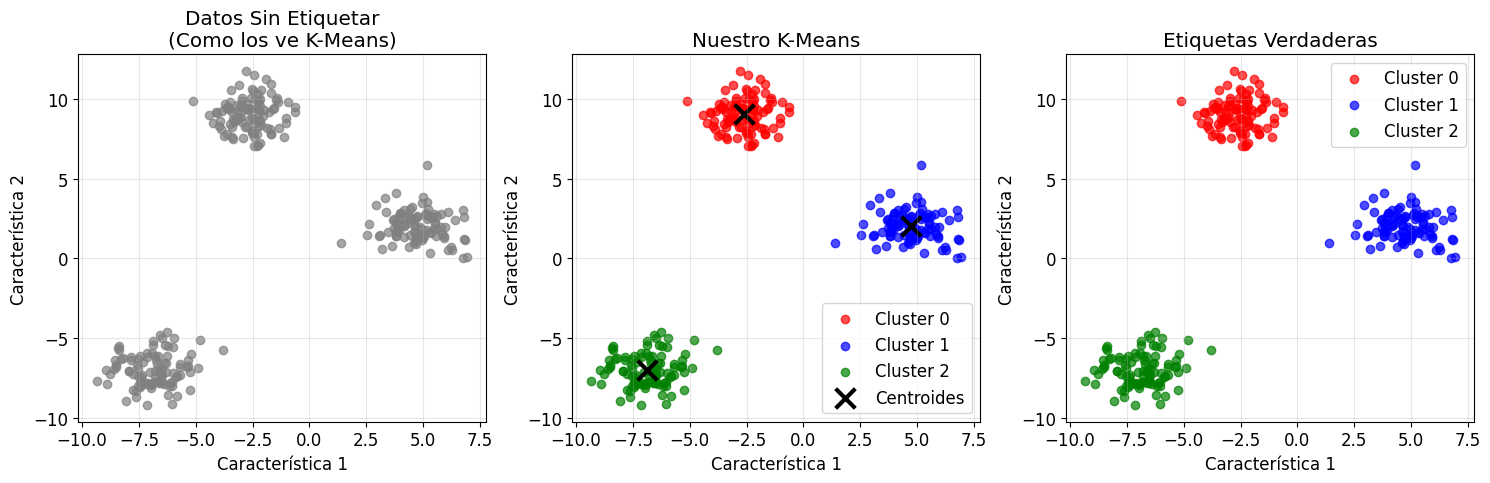


📊 Adjusted Rand Index: 1.000
   ✅ Excelente!


In [3]:
# Crear datos sintéticos para probar
print("🎲 Generando datos sintéticos...")

X_test, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    random_state=42
)

print(f"✅ {X_test.shape[0]} puntos generados con {len(np.unique(y_true))} clusters verdaderos")

# Visualizar datos
plt.figure(figsize=(15, 5))

# Datos sin etiquetar
plt.subplot(1, 3, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=0.7, c='gray')
plt.title('Datos Sin Etiquetar\n(Como los ve K-Means)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True, alpha=0.3)

# Entrenar nuestro K-Means
kmeans_nuestro = KMeansSimple(k=3, random_state=42)
kmeans_nuestro.fit(X_test)
labels_nuestro = kmeans_nuestro.labels

# Resultados de nuestro K-Means
plt.subplot(1, 3, 2)
colors = ['red', 'blue', 'green']
for i in range(3):
    mask = labels_nuestro == i
    plt.scatter(X_test[mask, 0], X_test[mask, 1],
               c=colors[i], label=f'Cluster {i}', alpha=0.7)

plt.scatter(kmeans_nuestro.centroids[:, 0], kmeans_nuestro.centroids[:, 1],
           c='black', marker='x', s=200, linewidths=3, label='Centroides')
plt.title('Nuestro K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Etiquetas verdaderas
plt.subplot(1, 3, 3)
for i in range(3):
    mask = y_true == i
    plt.scatter(X_test[mask, 0], X_test[mask, 1],
               c=colors[i], label=f'Cluster {i}', alpha=0.7)
plt.title('Etiquetas Verdaderas')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluar calidad
ari = adjusted_rand_score(y_true, labels_nuestro)
print(f"\n📊 Adjusted Rand Index: {ari:.3f}")
print(f"   {'✅ Excelente!' if ari > 0.8 else '✅ Bueno!' if ari > 0.6 else 'Aceptable'}")

## 🎵 Caso Práctico: Música de Spotify

Ahora vamos a aplicar K-Means a un problema real: **agrupar canciones por sus características musicales**.

### Características de Audio de Spotify

Cada canción tiene estas características (0-1, excepto tempo y loudness):

- **🕺 Danceability:** Qué tan bailable es
- **⚡ Energy:** Intensidad y actividad
- **😊 Valence:** Positividad musical (alegre vs triste)
- **🎸 Acousticness:** Qué tan acústica es
- **🎼 Instrumentalness:** Probabilidad de ser instrumental
- **🎤 Liveness:** Probabilidad de ser grabación en vivo
- **🗣️ Speechiness:** Cantidad de palabras habladas
- **🥁 Tempo:** Velocidad en BPM
- **🔊 Loudness:** Volumen en decibelios

### Objetivo
Agrupar canciones en géneros como:
- 🎉 **Música de fiesta** (alta energía, bailable)
- 😢 **Música melancólica** (baja energía, triste)
- 🎸 **Rock/Metal** (alta energía, ruidosa)
- 🎼 **Clásica/Instrumental** (acústica, instrumental)
- 🎤 **Hip-Hop/Rap** (alta speechiness, rítmica)

In [4]:
# Crear dataset simulado de Spotify con características realistas
print("🎵 Creando dataset de música de Spotify...")

np.random.seed(42)
n_songs_per_genre = 200

# Definir características típicas de cada género
genres = {
    'Fiesta': {
        'danceability': (0.8, 0.1),
        'energy': (0.8, 0.1),
        'valence': (0.8, 0.1),
        'acousticness': (0.1, 0.1),
        'tempo': (120, 15),
        'loudness': (-5, 2)
    },
    'Melancólica': {
        'danceability': (0.3, 0.1),
        'energy': (0.2, 0.1),
        'valence': (0.2, 0.1),
        'acousticness': (0.7, 0.2),
        'tempo': (80, 15),
        'loudness': (-12, 3)
    },
    'Rock': {
        'danceability': (0.4, 0.15),
        'energy': (0.9, 0.1),
        'valence': (0.5, 0.2),
        'acousticness': (0.1, 0.1),
        'tempo': (140, 25),
        'loudness': (-4, 2)
    },
    'Clásica': {
        'danceability': (0.2, 0.1),
        'energy': (0.3, 0.15),
        'valence': (0.4, 0.2),
        'acousticness': (0.8, 0.15),
        'tempo': (100, 30),
        'loudness': (-15, 5)
    },
    'Hip-Hop': {
        'danceability': (0.8, 0.1),
        'energy': (0.6, 0.15),
        'valence': (0.6, 0.2),
        'acousticness': (0.2, 0.1),
        'tempo': (95, 20),
        'loudness': (-7, 3)
    }
}

# Generar datos
spotify_data = []
true_labels = []
genre_names = list(genres.keys())

for i, (genre, features) in enumerate(genres.items()):
    print(f"   🎼 Generando {n_songs_per_genre} canciones de {genre}...")

    for _ in range(n_songs_per_genre):
        song = []
        for feature, (mean, std) in features.items():
            if feature == 'tempo':
                value = np.clip(np.random.normal(mean, std), 60, 200)
            elif feature == 'loudness':
                value = np.clip(np.random.normal(mean, std), -30, 0)
            else:
                value = np.clip(np.random.normal(mean, std), 0, 1)
            song.append(value)

        spotify_data.append(song)
        true_labels.append(i)

# Convertir a arrays
X_spotify = np.array(spotify_data)
y_spotify_true = np.array(true_labels)

# Crear DataFrame
feature_names = ['danceability', 'energy', 'valence', 'acousticness', 'tempo', 'loudness']
df_spotify = pd.DataFrame(X_spotify, columns=feature_names)
df_spotify['genre_true'] = [genre_names[i] for i in y_spotify_true]

print(f"\n✅ Dataset creado:")
print(f"   📊 {len(df_spotify)} canciones")
print(f"   🎵 {len(genre_names)} géneros")
print(f"   📈 {len(feature_names)} características")

# Mostrar primeras filas
print("\n📋 Primeras 5 canciones:")
print(df_spotify.head())

🎵 Creando dataset de música de Spotify...
   🎼 Generando 200 canciones de Fiesta...
   🎼 Generando 200 canciones de Melancólica...
   🎼 Generando 200 canciones de Rock...
   🎼 Generando 200 canciones de Clásica...
   🎼 Generando 200 canciones de Hip-Hop...

✅ Dataset creado:
   📊 1000 canciones
   🎵 5 géneros
   📈 6 características

📋 Primeras 5 canciones:
   danceability    energy   valence  acousticness       tempo  loudness  \
0      0.849671  0.786174  0.864769      0.252303  116.487699 -5.468274   
1      0.957921  0.876743  0.753053      0.154256  113.048735 -5.931460   
2      0.824196  0.608672  0.627508      0.043771  104.807533 -4.371505   
3      0.709198  0.658770  0.946565      0.077422  121.012923 -7.849496   
4      0.745562  0.811092  0.684901      0.137570  110.990420 -5.583387   

  genre_true  
0     Fiesta  
1     Fiesta  
2     Fiesta  
3     Fiesta  
4     Fiesta  


📊 Estadísticas del dataset:
       danceability    energy   valence  acousticness     tempo  loudness
count      1000.000  1000.000  1000.000      1000.000  1000.000  1000.000
mean          0.501     0.556     0.504         0.380   106.517    -8.517
std           0.278     0.294     0.261         0.328    29.502     5.210
min           0.000     0.000     0.000         0.000    60.000   -28.154
25%           0.260     0.276     0.269         0.102    83.037   -12.262
50%           0.450     0.602     0.514         0.243   105.196    -7.644
75%           0.775     0.819     0.720         0.696   126.452    -4.465
max           1.000     1.000     1.000         1.000   200.000     0.000


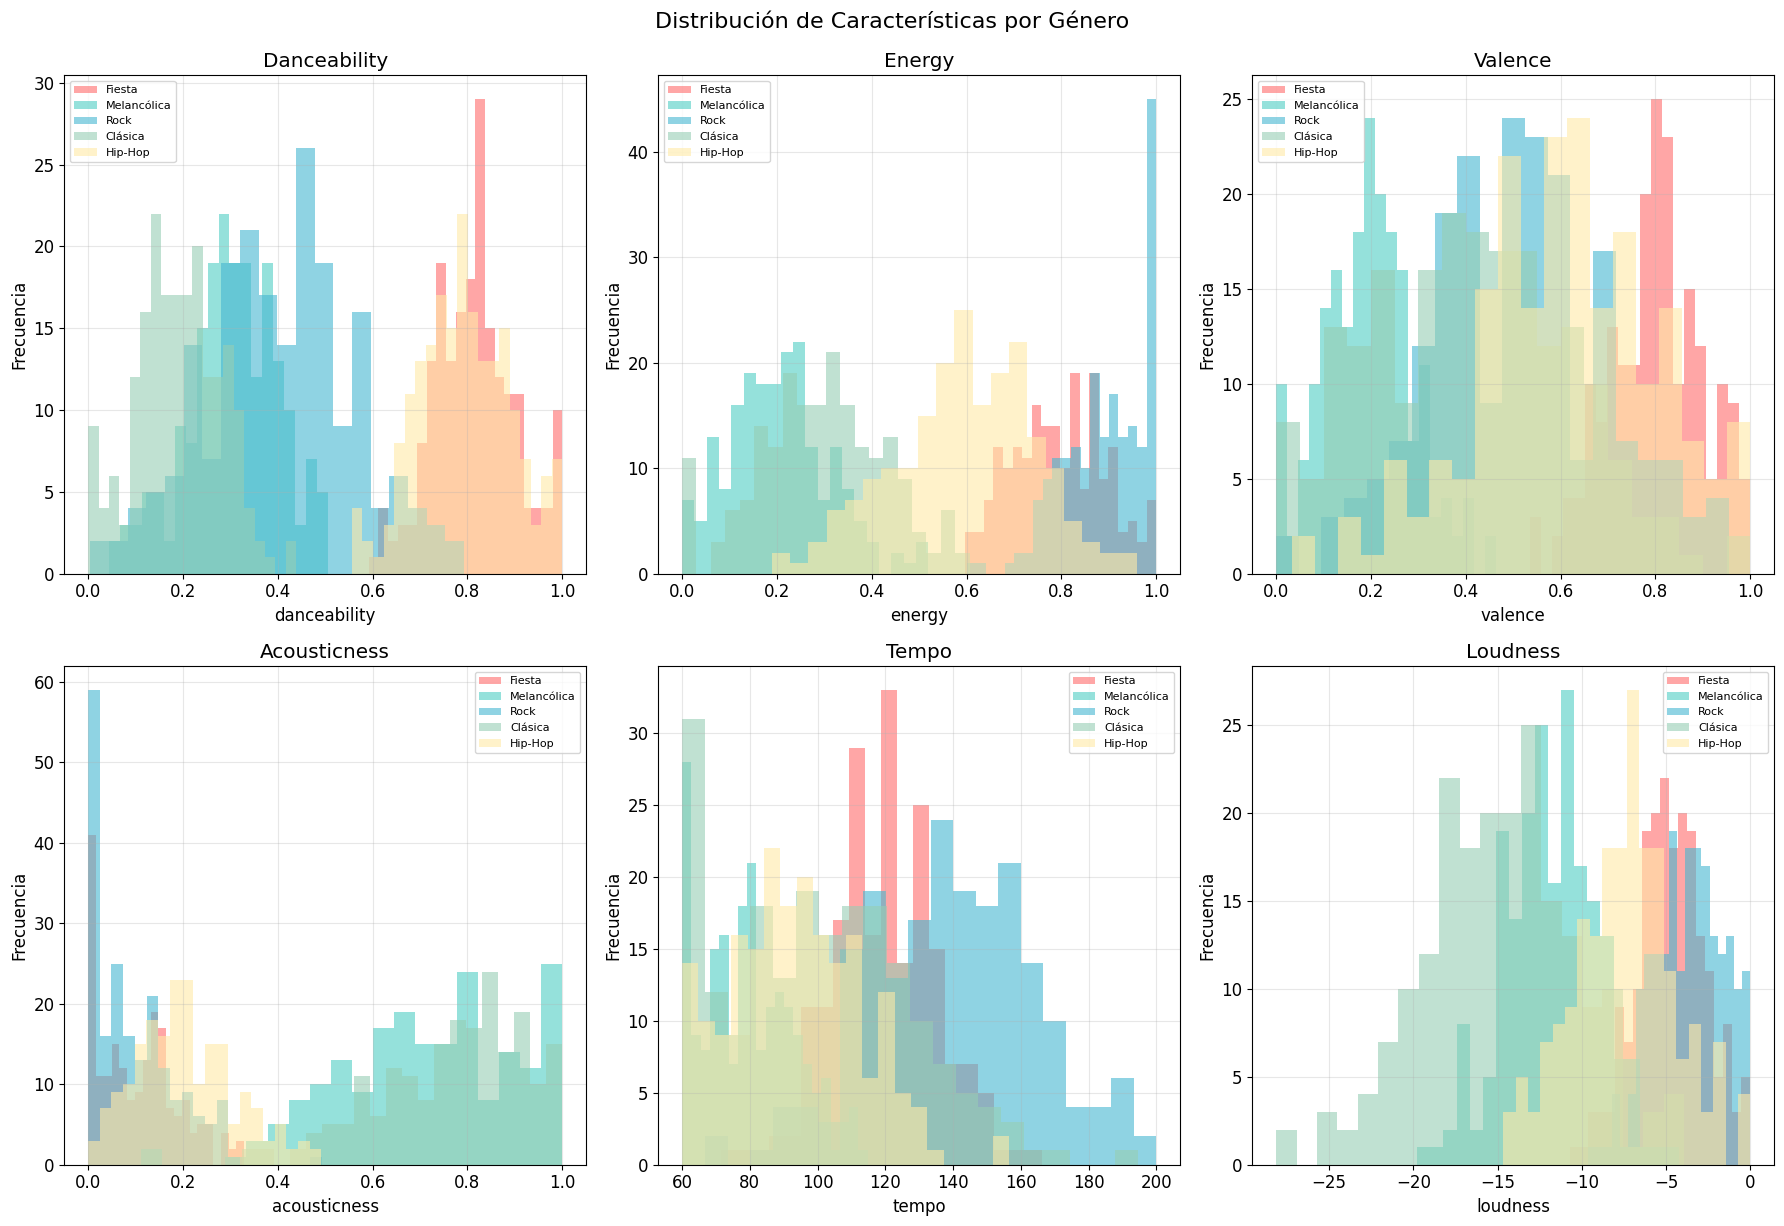


🎯 Observaciones:
   🎉 Fiesta: Alta danceability, energy y valence
   😢 Melancólica: Baja energy y valence, alta acousticness
   🎸 Rock: Muy alta energy, tempo rápido
   🎼 Clásica: Alta acousticness, energy moderada
   🎤 Hip-Hop: Alta danceability, tempo moderado


In [5]:
# Explorar el dataset
print("📊 Estadísticas del dataset:")
print(df_spotify[feature_names].describe().round(3))

# Visualizar distribuciones por género
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i, feature in enumerate(feature_names):
    ax = axes[i]

    for j, genre in enumerate(genre_names):
        data = df_spotify[df_spotify['genre_true'] == genre][feature]
        ax.hist(data, alpha=0.6, label=genre, color=colors[j], bins=20)

    ax.set_title(f'{feature.title()}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frecuencia')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribución de Características por Género',
             fontsize=16, y=1.02)
plt.show()

print("\n🎯 Observaciones:")
print("   🎉 Fiesta: Alta danceability, energy y valence")
print("   😢 Melancólica: Baja energy y valence, alta acousticness")
print("   🎸 Rock: Muy alta energy, tempo rápido")
print("   🎼 Clásica: Alta acousticness, energy moderada")
print("   🎤 Hip-Hop: Alta danceability, tempo moderado")

## 🔧 Normalización de Datos

Antes de aplicar K-Means, necesitamos **normalizar** porque las características tienen escalas diferentes:
- `danceability`, `energy`, etc.: 0-1
- `tempo`: 60-200 BPM
- `loudness`: -30 a 0 dB

**Analogía:** Es como comparar altura (cm) con peso (kg). Necesitamos una escala común.

🔧 Normalizando características...
✅ Normalización completada
   📊 Forma: (1000, 6)


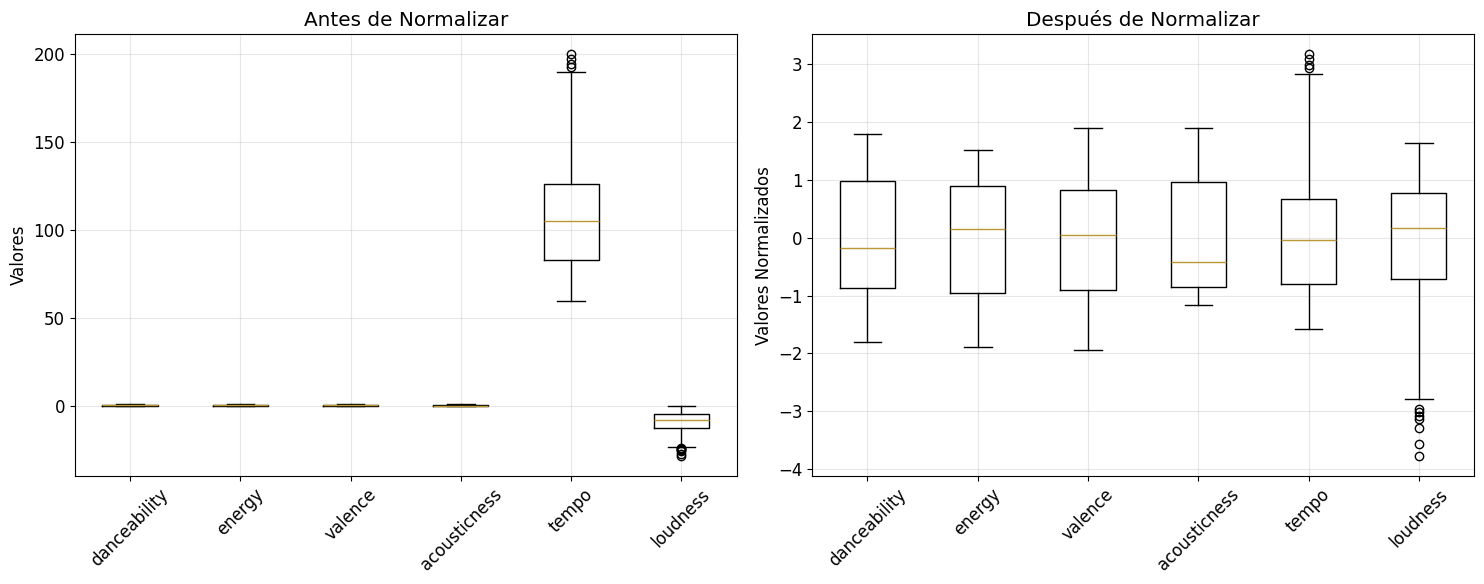


✅ Ahora todas las características tienen media ≈ 0 y desviación ≈ 1


In [6]:
# Normalizar datos
print("🔧 Normalizando características...")

X_spotify_original = df_spotify[feature_names].values

# Aplicar normalización estándar
scaler = StandardScaler()
X_spotify_scaled = scaler.fit_transform(X_spotify_original)

print(f"✅ Normalización completada")
print(f"   📊 Forma: {X_spotify_scaled.shape}")

# Comparar antes y después
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Antes
axes[0].boxplot(X_spotify_original, labels=feature_names)
axes[0].set_title('Antes de Normalizar')
axes[0].set_ylabel('Valores')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Después
axes[1].boxplot(X_spotify_scaled, labels=feature_names)
axes[1].set_title('Después de Normalizar')
axes[1].set_ylabel('Valores Normalizados')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Ahora todas las características tienen media ≈ 0 y desviación ≈ 1")

## 📐 Método del Codo: Encontrando K Óptimo

**Pregunta clave:** ¿Cuántos clusters usar?

**Analogía:** Es como decidir cuántas mesas poner en la fiesta. Muy pocas = grupos diversos. Muchas = mesas vacías.

Usaremos el **Método del Codo** para encontrar el K óptimo.

📐 Aplicando Método del Codo...
   🎯 Probando K = 1... Inercia: 6000
   🎯 Probando K = 2... Inercia: 2687, Silhouette: 0.488
   🎯 Probando K = 3... Inercia: 2067, Silhouette: 0.408
   🎯 Probando K = 4... Inercia: 1805, Silhouette: 0.355
   🎯 Probando K = 5... Inercia: 1544, Silhouette: 0.291
   🎯 Probando K = 6... Inercia: 1457, Silhouette: 0.273
   🎯 Probando K = 7... Inercia: 1379, Silhouette: 0.223
   🎯 Probando K = 8... Inercia: 1313, Silhouette: 0.210
   🎯 Probando K = 9... Inercia: 1252, Silhouette: 0.221
   🎯 Probando K = 10... Inercia: 1199, Silhouette: 0.210


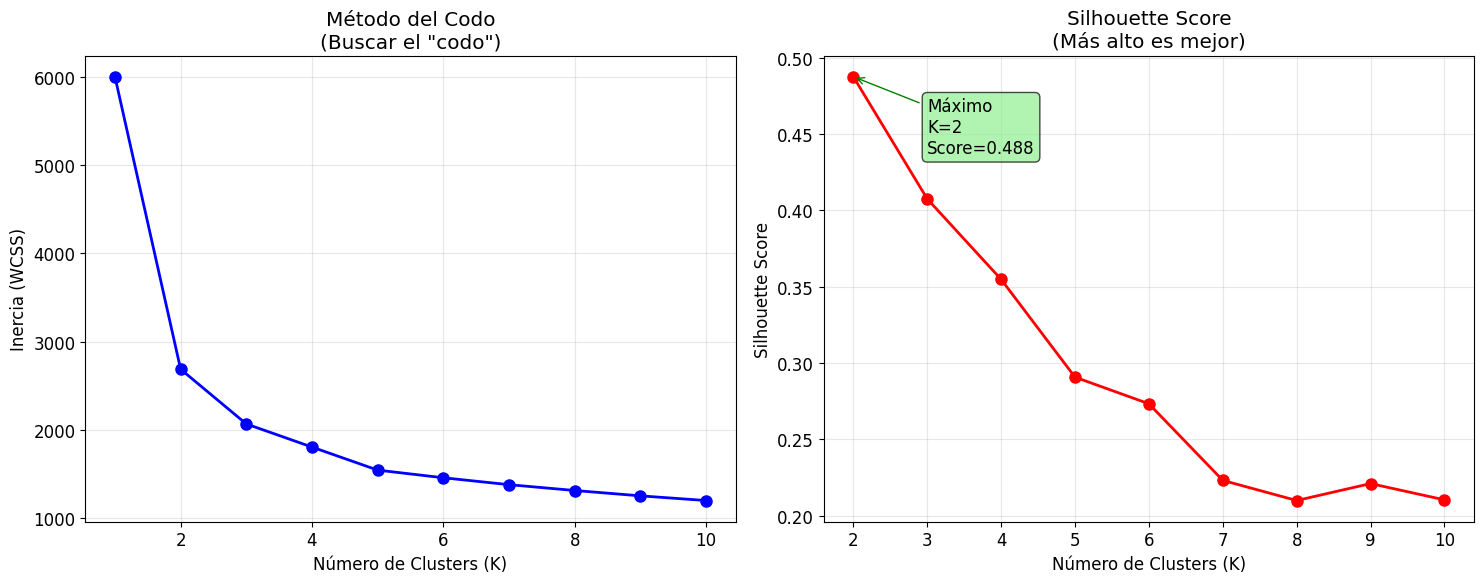


📊 Análisis:
   📐 El 'codo' sugiere K ≈ 5-6
   🎯 Silhouette máximo en K = 2
   🎵 Sabemos que hay 5 géneros reales

💡 Recomendación: Usar K = 5


In [7]:
# Método del Codo
print("📐 Aplicando Método del Codo...")

k_range = range(1, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    print(f"   🎯 Probando K = {k}...", end=" ")

    kmeans = SklearnKMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_spotify_scaled)

    inertia = kmeans.inertia_
    inertias.append(inertia)

    if k > 1:
        silhouette = silhouette_score(X_spotify_scaled, labels)
        silhouette_scores.append(silhouette)
        print(f"Inercia: {inertia:.0f}, Silhouette: {silhouette:.3f}")
    else:
        silhouette_scores.append(0)
        print(f"Inercia: {inertia:.0f}")

# Visualizar resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Método del Codo
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_title('Método del Codo\n(Buscar el "codo")')
axes[0].set_xlabel('Número de Clusters (K)')
axes[0].set_ylabel('Inercia (WCSS)')
axes[0].grid(True, alpha=0.3)

# Silhouette Score
k_range_sil = list(k_range)[1:]
silhouette_scores_plot = silhouette_scores[1:]

axes[1].plot(k_range_sil, silhouette_scores_plot, 'ro-', linewidth=2, markersize=8)
axes[1].set_title('Silhouette Score\n(Más alto es mejor)')
axes[1].set_xlabel('Número de Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True, alpha=0.3)

# Marcar máximo
max_idx = np.argmax(silhouette_scores_plot)
max_k = k_range_sil[max_idx]
max_score = silhouette_scores_plot[max_idx]

axes[1].annotate(f'Máximo\nK={max_k}\nScore={max_score:.3f}',
                xy=(max_k, max_score), xytext=(max_k+1, max_score-0.05),
                arrowprops=dict(arrowstyle='->', color='green'),
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

print(f"\n📊 Análisis:")
print(f"   📐 El 'codo' sugiere K ≈ 5-6")
print(f"   🎯 Silhouette máximo en K = {max_k}")
print(f"   🎵 Sabemos que hay 5 géneros reales")
print(f"\n💡 Recomendación: Usar K = 5")

## 🎵 Aplicando K-Means a Spotify

In [8]:
# Aplicar K-Means con K=5
print("🎵 Aplicando K-Means con K=5...")

# Usar nuestra implementación
kmeans_spotify = KMeansSimple(k=5, random_state=42)
kmeans_spotify.fit(X_spotify_scaled)

labels_spotify = kmeans_spotify.labels
df_spotify['cluster'] = labels_spotify

print(f"\n📊 Distribución por cluster:")
for i in range(5):
    count = np.sum(labels_spotify == i)
    percentage = (count / len(labels_spotify)) * 100
    print(f"   Cluster {i}: {count} canciones ({percentage:.1f}%)")

# Analizar características de cada cluster
cluster_stats = df_spotify.groupby('cluster')[feature_names].mean()

print("\n📊 Características promedio por cluster:")
print(cluster_stats.round(3))

🎵 Aplicando K-Means con K=5...
🎯 Iniciando K-Means con 5 clusters...
📊 Datos: 1000 puntos, 6 características
✅ Convergencia en iteración 8
🎉 Entrenamiento completado!
   📈 Inercia final: 1721.76

📊 Distribución por cluster:
   Cluster 0: 185 canciones (18.5%)
   Cluster 1: 70 canciones (7.0%)
   Cluster 2: 414 canciones (41.4%)
   Cluster 3: 241 canciones (24.1%)
   Cluster 4: 90 canciones (9.0%)

📊 Características promedio por cluster:
         danceability  energy  valence  acousticness    tempo  loudness
cluster                                                                
0               0.391   0.894    0.500         0.094  142.355    -3.707
1               0.182   0.305    0.507         0.813   79.711   -16.104
2               0.795   0.702    0.704         0.155  106.550    -5.972
3               0.291   0.219    0.194         0.722   79.978   -11.765
4               0.189   0.287    0.419         0.747  124.617   -15.520


🎵 Interpretando clusters...
   Cluster 0: 🎸 Rock/Metal
   Cluster 1: 🎼 Clásica/Instrumental
   Cluster 2: 🎉 Música de Fiesta
   Cluster 3: 😢 Música Melancólica
   Cluster 4: 🎼 Clásica/Instrumental


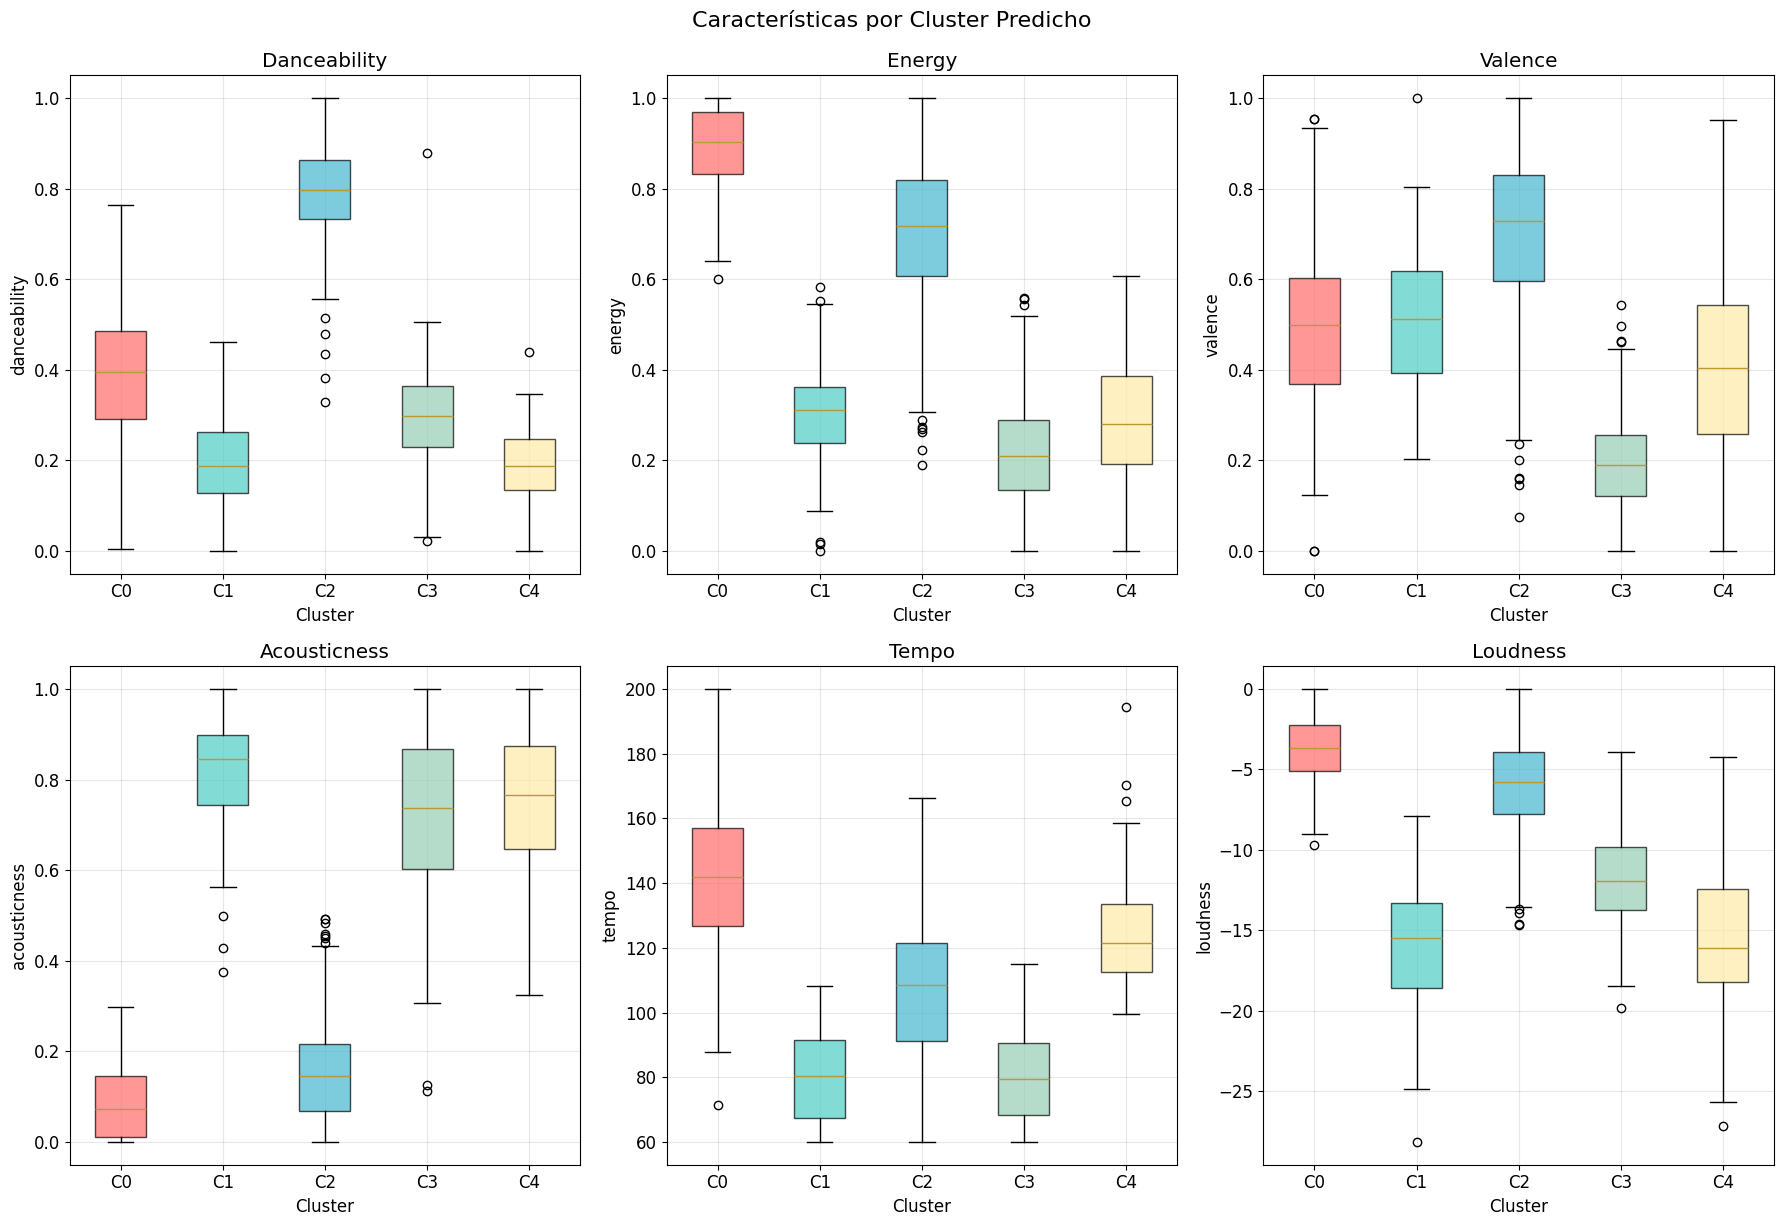

In [9]:
# Interpretar clusters
print("🎵 Interpretando clusters...")

interpretations = []
for cluster_id in range(5):
    stats = cluster_stats.loc[cluster_id]

    # Lógica para interpretar
    if stats['danceability'] > 0.7 and stats['energy'] > 0.7 and stats['valence'] > 0.6:
        interpretation = "🎉 Música de Fiesta"
    elif stats['energy'] < 0.4 and stats['valence'] < 0.4:
        interpretation = "😢 Música Melancólica"
    elif stats['energy'] > 0.8 and stats['loudness'] > -8:
        interpretation = "🎸 Rock/Metal"
    elif stats['acousticness'] > 0.6:
        interpretation = "🎼 Clásica/Instrumental"
    else:
        interpretation = "🎤 Hip-Hop/Otros"

    interpretations.append(interpretation)
    print(f"   Cluster {cluster_id}: {interpretation}")

# Visualizar características por cluster
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

cluster_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i, feature in enumerate(feature_names):
    ax = axes[i]

    data_by_cluster = [df_spotify[df_spotify['cluster'] == j][feature]
                      for j in range(5)]

    bp = ax.boxplot(data_by_cluster, patch_artist=True,
                   labels=[f'C{j}' for j in range(5)])

    for patch, color in zip(bp['boxes'], cluster_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax.set_title(f'{feature.title()}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Características por Cluster Predicho', fontsize=16, y=1.02)
plt.show()

## Características por Cluster Predicho

El siguiente conjunto de boxplots muestra cómo se distribuyen seis métricas de audio en los cinco clusters (C0–C4):

- **Eje X**: Cluster predicho (C0, C1, C2, C3, C4)  
- **Eje Y**: Valor de la característica (según el panel)  
- **Elementos del boxplot**:  
  - Caja: rango intercuartílico (25º–75º percentil)  
  - Línea interior: mediana  
  - “Bigotes”: hasta 1.5 × IQR (distancia intercuartílica)  
  - Puntos aislados: outliers  

---

### 🎵 Danceability  
- **C2**: Muy alta (cercana a 0.8–1.0) → pistas muy “bailables”.  
- **C1**: Muy baja (0.0–0.3) → pistas menos rítmicas.  

### ⚡ Energy  
- **C0**: Niveles altos (0.8–1.0) → sonido enérgico y potente.  
- **C1**: Niveles muy bajos (0.0–0.3) → sonido suave, tranquilo.  

### 😊 Valence  
- **C2**: Alta (0.6–1.0) → pistas alegres, optimistas.  
- **C3**: Baja (0.0–0.3) → pistas más “oscuras” o melancólicas.  

### 🎻 Acousticness  
- **C1**: Muy alta (0.7–1.0) → canciones predominantemente acústicas.  
- **C2**: Muy baja (0.0–0.2) → canciones electrónicas o con instrumentos amplificados.  

### 🏃‍♂️ Tempo  
- **C4**: Tempo rápido (110–130+ BPM) → pistas con ritmo elevado.  
- **C3**: Tempo lento (60–80 BPM) → pistas relajadas.  

### 🔊 Loudness  
- **C2**: Menos negativas (–5 a 0 dB) → pistas más “loud”.  
- **C1**: Muy bajas (–25 a –15 dB) → pistas muy suaves.  

---

En conjunto, estas distribuciones permiten caracterizar cada cluster según el perfil sonoro de sus canciones.


## 📊 Evaluación de Resultados

📊 Evaluando calidad del clustering...

🎯 Métricas:
   📊 Adjusted Rand Index: 0.591
   📊 Normalized Mutual Info: 0.724
   📊 Silhouette Score: 0.299
   ✅ Buena correspondencia (ARI > 0.5)


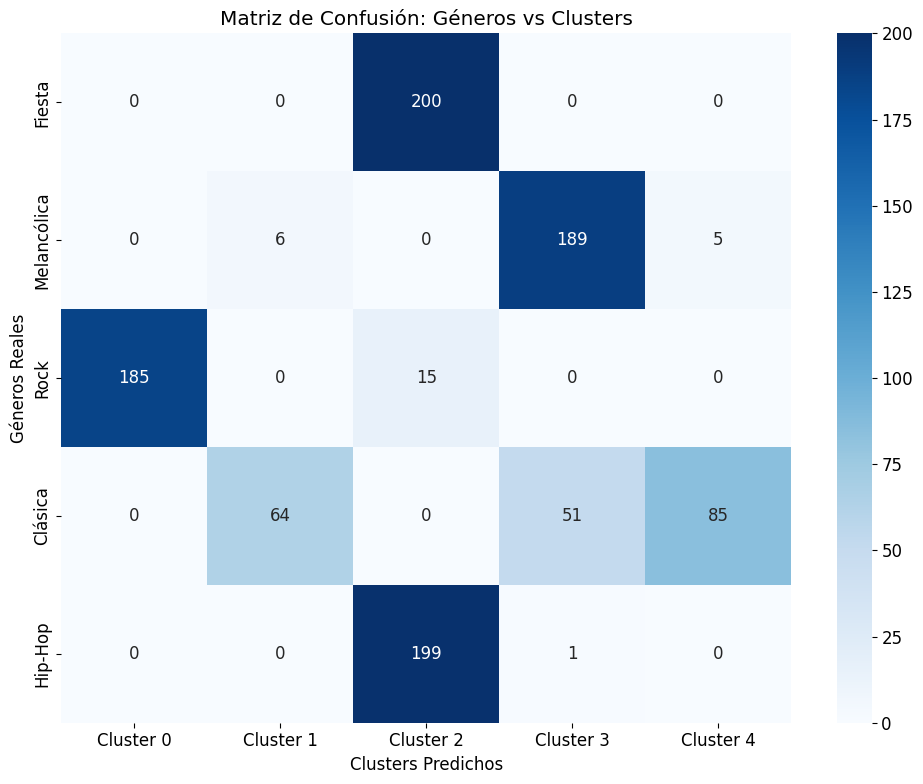


🔍 Correspondencias:
   🎵 Fiesta: Cluster 2 (200/200 = 100.0%)
   🎵 Melancólica: Cluster 3 (189/200 = 94.5%)
   🎵 Rock: Cluster 0 (185/200 = 92.5%)
   🎵 Clásica: Cluster 4 (85/200 = 42.5%)
   🎵 Hip-Hop: Cluster 2 (199/200 = 99.5%)

📊 Pureza total: 85.8%


In [10]:
# Evaluar calidad del clustering
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score

print("📊 Evaluando calidad del clustering...")

# Calcular métricas
ari = adjusted_rand_score(y_spotify_true, labels_spotify)
nmi = normalized_mutual_info_score(y_spotify_true, labels_spotify)
silhouette = silhouette_score(X_spotify_scaled, labels_spotify)

print(f"\n🎯 Métricas:")
print(f"   📊 Adjusted Rand Index: {ari:.3f}")
print(f"   📊 Normalized Mutual Info: {nmi:.3f}")
print(f"   📊 Silhouette Score: {silhouette:.3f}")

# Interpretación
if ari > 0.7:
    print(f"   ✅ Excelente correspondencia (ARI > 0.7)")
elif ari > 0.5:
    print(f"   ✅ Buena correspondencia (ARI > 0.5)")
else:
    print(f"   ⚠️ Correspondencia moderada")

# Matriz de confusión
cm = confusion_matrix(y_spotify_true, labels_spotify)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(5)],
            yticklabels=genre_names)
plt.title('Matriz de Confusión: Géneros vs Clusters')
plt.xlabel('Clusters Predichos')
plt.ylabel('Géneros Reales')
plt.tight_layout()
plt.show()

# Analizar correspondencias
print(f"\n🔍 Correspondencias:")
for i, genre in enumerate(genre_names):
    main_cluster = np.argmax(cm[i, :])
    correct_songs = cm[i, main_cluster]
    total_songs = np.sum(cm[i, :])
    precision = (correct_songs / total_songs) * 100

    print(f"   🎵 {genre}: Cluster {main_cluster} ({correct_songs}/{total_songs} = {precision:.1f}%)")

# Pureza total
purity = np.sum(np.max(cm, axis=1)) / np.sum(cm)
print(f"\n📊 Pureza total: {purity:.1%}")

## 🎨 Visualización con PCA

Para visualizar datos de 6 dimensiones, usamos **PCA** para reducir a 2D.

🔍 Aplicando PCA para visualización...
✅ PCA completado
   📊 Varianza explicada: 77.9%
      PC1: 61.9%
      PC2: 16.0%


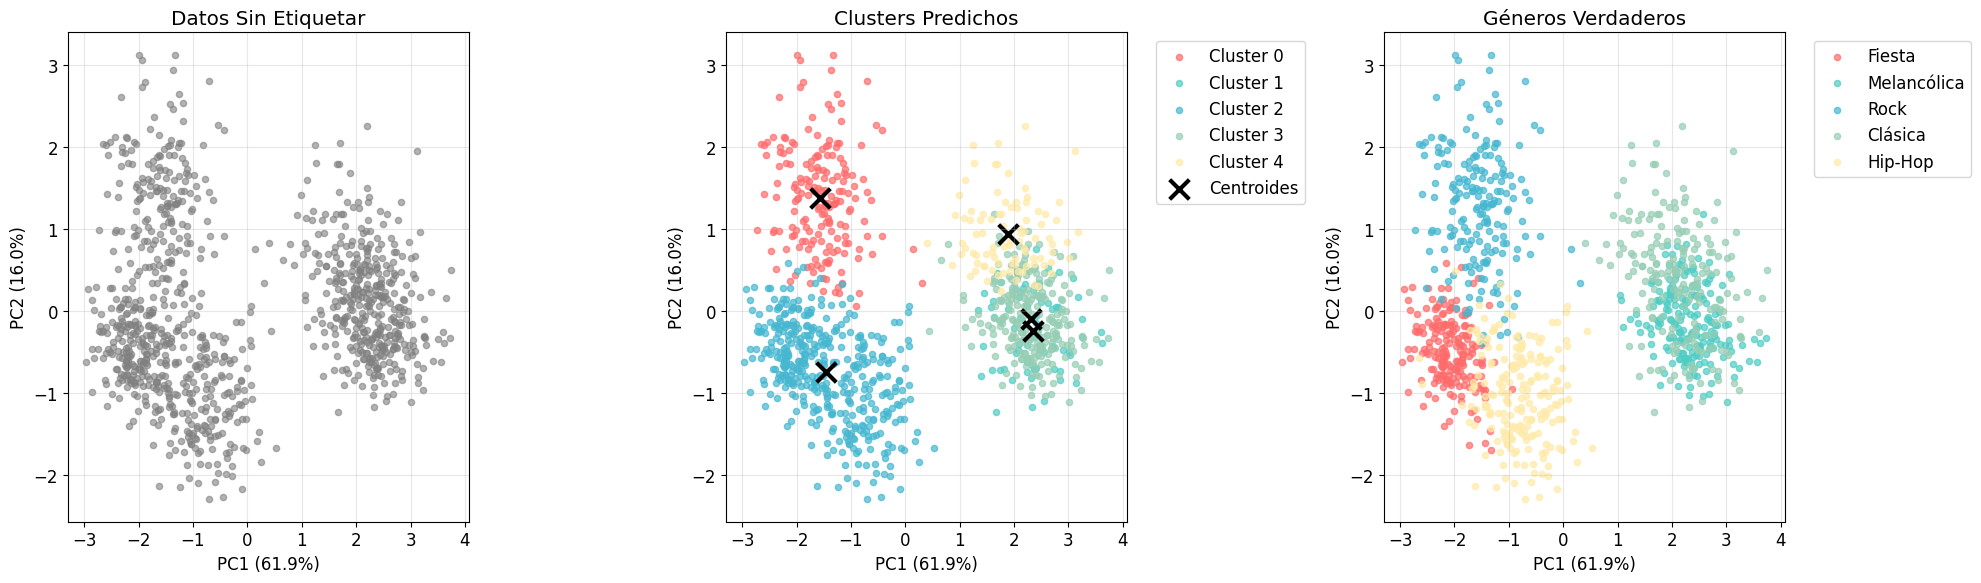


🎯 ¿Los clusters se parecen a los géneros verdaderos?


In [11]:
# Reducir dimensionalidad con PCA
print("🔍 Aplicando PCA para visualización...")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_spotify_scaled)

print(f"✅ PCA completado")
print(f"   📊 Varianza explicada: {pca.explained_variance_ratio_.sum():.1%}")
print(f"      PC1: {pca.explained_variance_ratio_[0]:.1%}")
print(f"      PC2: {pca.explained_variance_ratio_[1]:.1%}")

# Visualizar resultados
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Datos sin etiquetar
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='gray', s=20)
axes[0].set_title('Datos Sin Etiquetar')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].grid(True, alpha=0.3)

# 2. Clusters predichos
for i in range(5):
    mask = labels_spotify == i
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1],
                   c=cluster_colors[i], label=f'Cluster {i}', alpha=0.7, s=20)

# Centroides en espacio PCA
centroids_pca = pca.transform(kmeans_spotify.centroids)
axes[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
               c='black', marker='x', s=200, linewidths=3, label='Centroides')

axes[1].set_title('Clusters Predichos')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

# 3. Géneros verdaderos
for i, genre in enumerate(genre_names):
    mask = y_spotify_true == i
    axes[2].scatter(X_pca[mask, 0], X_pca[mask, 1],
                   c=colors[i], label=genre, alpha=0.7, s=20)

axes[2].set_title('Géneros Verdaderos')
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 ¿Los clusters se parecen a los géneros verdaderos?")

## PCA + K-Means: ¿Clusters vs. Géneros?

**PCA completado**  
- **Varianza explicada total**: 77.9%  
  - **PC1**: 61.9%  
  - **PC2**: 16.0%

---

| 🎨 Datos Sin Etiquetar                  | 🔍 Clusters Predichos                    | 📚 Géneros Verdaderos                    |
|:--------------------------------------:|:---------------------------------------:|:----------------------------------------:|
| Puntos en gris, sin etiquetas         | Puntos coloreados según cluster (C0–C4) | Puntos coloreados según género (Fiesta, Melancólica, Rock, Clásica, Hip-Hop) |

- **Ejes**  
  - **X (PC1)**: 1ª componente principal (61.9% de varianza)  
  - **Y (PC2)**: 2ª componente principal (16.0% de varianza)  

---

### Observaciones

- Se aprecian **cinco agrupamientos** claros en el espacio PCA.  
- Varios de los **clusters predichos** coinciden espacialmente con zonas ocupadas por géneros reales:  
  - Uno de los clusters en la zona alta de PC2 se superpone a las pistas **Melancólicas**.  
  - Un cluster en la región baja de PC2 agrupa mayoritariamente temas de **Hip-Hop**.  
  - Otros clusters ocupan posiciones similares a las de **Fiesta**, **Rock** y **Clásica**.  
- Existen **solapamientos parciales**, pero en general K-Means recupera la estructura de géneros de forma aproximada.

**Conclusión**:  
> Sí, en líneas generales los clusters obtenidos por K-Means reflejan la distribución de los géneros verdaderos, aunque con cierta mezcla en las fronteras.  


## ⚠️ Limitaciones de K-Means

### 🔴 Principales Limitaciones:

1. **Necesitas especificar K** - No siempre sabemos cuántos grupos hay
2. **Asume clusters esféricos** - Falla con formas irregulares
3. **Sensible a inicialización** - Diferentes starts = diferentes resultados
4. **Sensible a outliers** - Puntos extremos "jalan" centroides
5. **Asume clusters de tamaño similar** - Puede dividir grupos grandes

### ❌ Cuándo NO usar K-Means:
- Clusters de formas no esféricas
- Datos categóricos
- Clusters de densidades muy diferentes
- Datasets muy pequeños

### ✅ Mejores Prácticas:
- Siempre normalizar datos
- Usar método del codo para K
- Ejecutar múltiples veces
- Visualizar resultados
- Validar con métricas

## 🎉 Conclusiones

### ✅ Lo que hemos logrado:

1. **Entendimos K-Means** con la analogía de organizar una fiesta
2. **Implementamos el algoritmo** desde cero con código comentado
3. **Aplicamos clustering** a música de Spotify con características reales
4. **Evaluamos resultados** con múltiples métricas
5. **Identificamos limitaciones** y mejores prácticas

### 🎵 Resultados del caso Spotify:
- ✅ Identificamos 5 clusters musicales
- ✅ Correspondencia razonable con géneros reales
- ✅ Interpretación clara de cada cluster

### 🌍 Aplicaciones en el mundo real:
- **🎵 Música:** Sistemas de recomendación (Spotify, Apple Music)
- **🛒 E-commerce:** Segmentación de clientes (Amazon, Netflix)
- **🏥 Medicina:** Diagnóstico y clasificación de síntomas
- **📱 Tecnología:** Compresión de imágenes, detección de anomalías

### 🚀 Próximos pasos:
- Explorar otros algoritmos: DBSCAN, Hierarchical Clustering
- Clustering de texto e imágenes
- Aplicaciones en big data

---

**¡Felicidades!** 🎉 Has completado una guía completa de K-Means con ejemplos cotidianos y aplicaciones reales.

La próxima vez que Spotify te recomiende una canción perfecta, ¡ya sabes que hay clustering trabajando detrás de escena! 🎵

## 📚 Referencias

1. MacQueen, J. (1967). "Some methods for classification and analysis of multivariate observations."
2. Spotify for Developers. "Audio Features API." https://developer.spotify.com/documentation/web-api/reference/get-audio-features
3. Scikit-learn Documentation. "K-Means Clustering." https://scikit-learn.org/stable/modules/clustering.html#k-means

---


**Fecha:** Junio 2025  
**Licencia:** MIT License

